## Scikitlearn libraries

In [2]:
# import the iris dataset from sklearn
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# use petal length and petal width as the 2 features to use for this excercise
# these are columns 2 and 3
X = iris.data[:,[2,3]]
y = iris.target

0 - Setosa  
1- Versicolor  
2 - Verginica

In [23]:
import sklearn
import scipy

In [28]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
# lets standardize them
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
#Use perceptron from sklearn.linear_model
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,n_iter=40,random_state=0)

In [36]:
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [42]:
y_pred = ppn.predict(X_test_std)

In [63]:
(y_pred != y_test).sum()/len(y_pred)

0.088888888888888892

In [66]:
print('Miscalculation Error = %f' %((y_pred != y_test).sum()/len(y_pred)))

Miscalculation Error = 0.088889


In [67]:
# accuracy of the model can also be reported, as 1-ME

In [68]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline



In [103]:
def plot_descision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    ''' Plot descision regions for a classifer
    X - dataset array of shape (n_rows,m_features)
    y - target array
    classifier - classifier to test
    resolution - resolution of the grid
    test_idx - test dataset
    '''
    # create a colormap
    colors=('red','blue','lightgreen','cyan')
    markers = ('s','x','o','^','v')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the descision surface
    # we are using only 2 features, so 
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max() +1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max() +1
    
    #create the meshgrid arrays, for both the features
    xx1,xx2 = np.meshgrid(
                  np.arange(x1_min,x1_max,resolution),
                  np.arange(x2_min,x2_max,resolution)
    )
    # get the predicted targets for these points
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    # now reshape z to the same shape as xx1
    z = z.reshape(xx1.shape)
    # and plot a contour fn graph
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot the entire dataset now
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],c=cmap(idx),marker=markers[idx],label=cl,alpha=0.8)
        
    #for idx, cl in enumerate(np.unique(y)):
     #   plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      #              alpha=0.8, c=cmap(idx),
       #             marker=markers[idx], label=cl)

        
    # next plot the test region
    if test_idx:
        X_test = X[test_idx:]
        plt.scatter(x=X_test[:,0],y=X_test[:,1],linewidth=1,alpha=1.0,s=55,label='test set',c='')

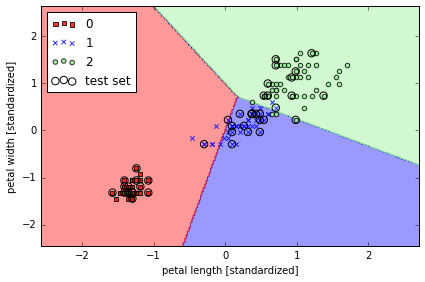

In [104]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_descision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=105)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()


The perceptron only converges on the datasets whose classes are linearly sparabale. Hence not typically used.

## Logistic regression

This can be implemented as a adaline neuron, by replacing the cost function, and modifying the target to 1 and 0.

In [106]:
# lets use the scikit learn package
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
# thats it, just fit the data now
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

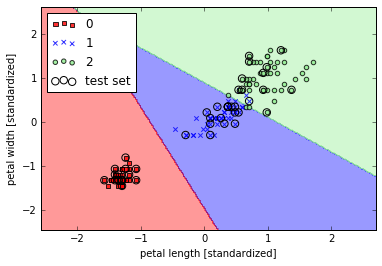

In [107]:
# plot descision regions
plot_descision_regions(X_combined_std,y_combined,classifier=lr,test_idx=105)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [110]:
# predict the probabilty of a sample
lr.predict_proba(X_test_std[0:2,:])

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01],
       [  6.08753106e-04,   9.99285569e-01,   1.05678028e-04]])

## Support Vector Machines

In [111]:
# An SVM is a perceptron with margin maximization

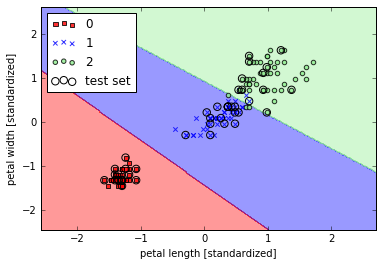

In [112]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_descision_regions(X_combined_std,y_combined,classifier=svm,test_idx=105)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

## Non linear SVM
The approach here to map the given data into a higher dimensional space, and then run the svm to find the dividing hyperplane.
To simplify this, kernel trick is used, 
A kernal is a replacement for the dot product of the two vectors
Say for two vectors $\overrightarrow{x^{(i)}}$ and $\overrightarrow{x^{(j)}}$  
$$k(\overrightarrow{x^{(i)}},\overrightarrow{x^{(j)}}) = exp(- \gamma ||\overrightarrow{x^{(i)}} - \overrightarrow{x^{(j)}}||^2)$$  
This is called the Radial basis function Kernel(RBF kernel)

In [117]:
# lets create a dataset with 200 data points, where the target is the xor function
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)

In [118]:
y_xor = np.where(y_xor,1,-1)

(-3.0, 3.0)

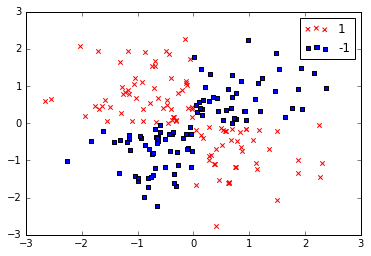

In [123]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='r',marker='x',label=1)
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='b',marker='s',label=-1)
plt.legend()
plt.ylim(-3.0)

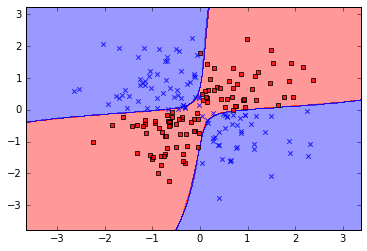

In [125]:
# lets train svm with rbf kernel
# gamma = 0.1 and C=10. -> stricter penalty on misclassification
svm = SVC(kernel='rbf',gamma=0.1,C=10.0,random_state=0)
svm.fit(X_xor,y_xor)
plot_descision_regions(X_xor,y_xor,svm)

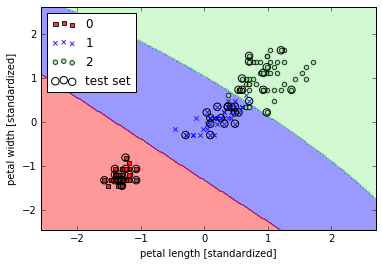

In [128]:
# lets try to classify the origional dataset with rbf svm
svm = SVC(kernel='rbf',gamma=0.1,C=10.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_descision_regions(X_combined_std,y_combined,classifier=svm,test_idx=105)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [ ]:
# lets check impact of gamma on boundary


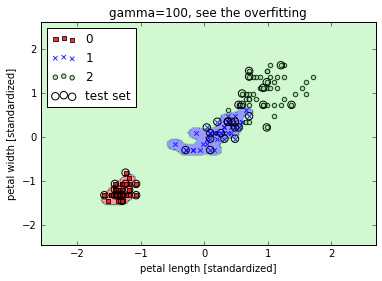

In [142]:
svm = SVC(kernel='rbf',gamma=100,C=10.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_descision_regions(X_combined_std,y_combined,classifier=svm,test_idx=105)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title("gamma=100, see the overfitting")

## Desision trees

In [144]:
# Lets try to visualize how the descision tree classifier works
from sklearn.tree import DecisionTreeClassifier

In [145]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [154]:
dtc.fit(X_train,y_train)
X_combined = np.vstack([X_train,X_test])

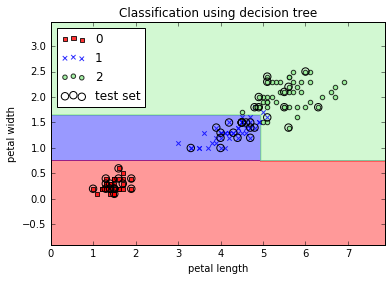

In [156]:
plot_descision_regions(X_combined,y_combined,classifier=dtc,test_idx=105)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.title('Classification using decision tree')


## Random forests

In [157]:
# this is an ensamble for many decision trees


1. select a random subset s of the dataset
2. select d random random features for s and grow desciion trees on s
3. take the tast sample and apply it on all the k decision trees, and find the majority wins class

In [158]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
rfc = RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=10,n_jobs=2)

In [169]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

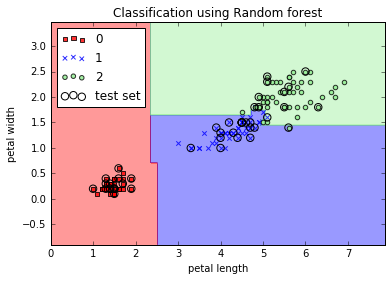

In [170]:
plot_descision_regions(X_combined,y_combined,classifier=rfc,test_idx=105)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.title('Classification using Random forest')

## K nearest neighbor classification  
knn classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

In [171]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

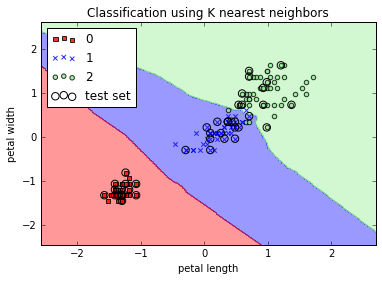

In [172]:
plot_descision_regions(X_combined_std,y_combined,classifier=knn,test_idx=105)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.title('Classification using K nearest neighbors')